<a href="https://colab.research.google.com/github/yokivaknin/BigInt/blob/main/firstExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing everything necessary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# getting the data

In [ ]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# checking the data


*   see some random lines from the data
*   visualizing the split between targets
*   PCA on the data to see if there is an irrelevant column





In [ ]:
# Convert to a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Show 5 random rows
df.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


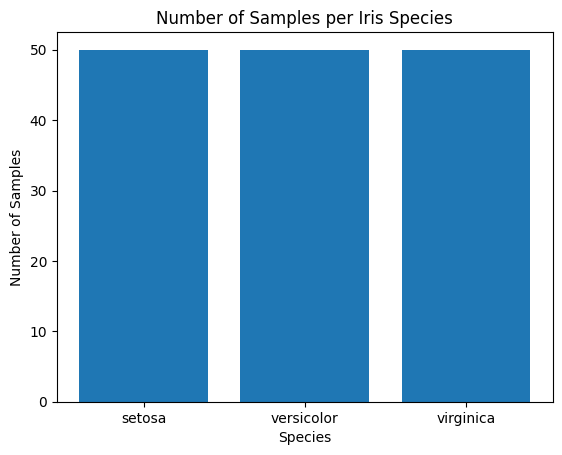

In [ ]:
# Count the number of samples for each species
species_counts = df['species'].value_counts().sort_index()

# Map numeric labels to species names
species_names = [iris.target_names[i] for i in species_counts.index]

# Plot the bar chart
plt.bar(species_names, species_counts)
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Iris Species')
plt.show()

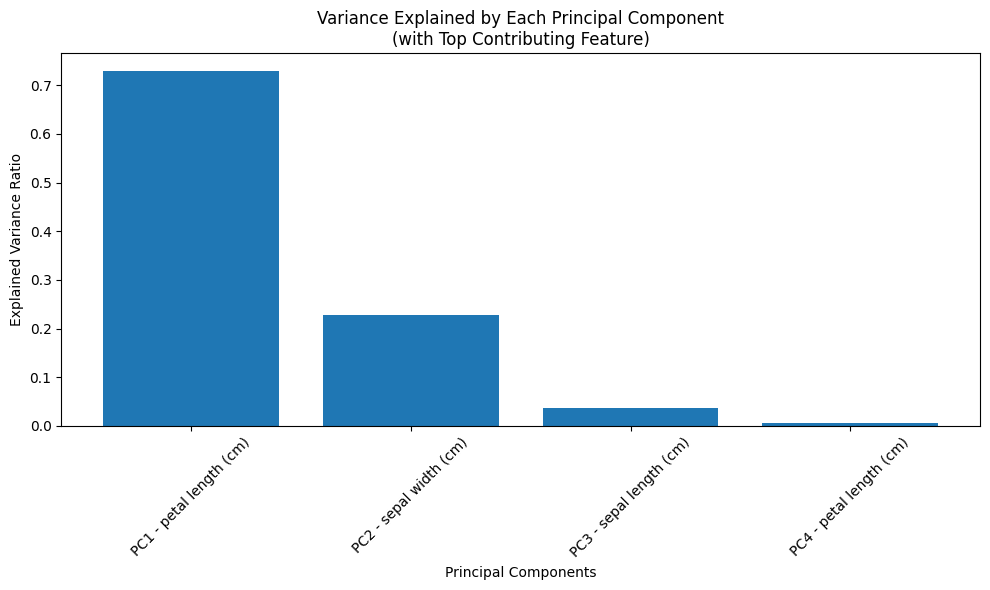

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Find top contributing feature for each principal component
top_features = np.argmax(np.abs(pca.components_), axis=1)
tick_labels = [f'PC{i+1} - {feature_names[top_features[i]]}' for i in range(len(explained_variance))]

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), explained_variance, tick_label=tick_labels)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Each Principal Component\n(with Top Contributing Feature)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# conclusions



1.   the dataset is split equally between targets
2.   the contribution of the fourth petal length to the ability to classify correctly is minimal.


# **parsing the data for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape to 2D for OneHotEncoder

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# building the Neural Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.1621 - loss: 1.5569 - val_accuracy: 0.6667 - val_loss: 1.0681
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6189 - loss: 1.1061 - val_accuracy: 0.7500 - val_loss: 0.9135
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7175 - loss: 0.9218 - val_accuracy: 0.6667 - val_loss: 0.7035
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7582 - loss: 0.7061 - val_accuracy: 0.6667 - val_loss: 0.5797
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7608 - loss: 0.6503 - val_accuracy: 0.6667 - val_loss: 0.5230
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7604 - loss: 0.5177 - val_accuracy: 0.7500 - val_loss: 0.4788
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8391 - loss: 0.3911 - val_accuracy: 0.7500 - val_loss: 0.4310
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8900 - loss: 0.3089 - val_accuracy: 0.7500 

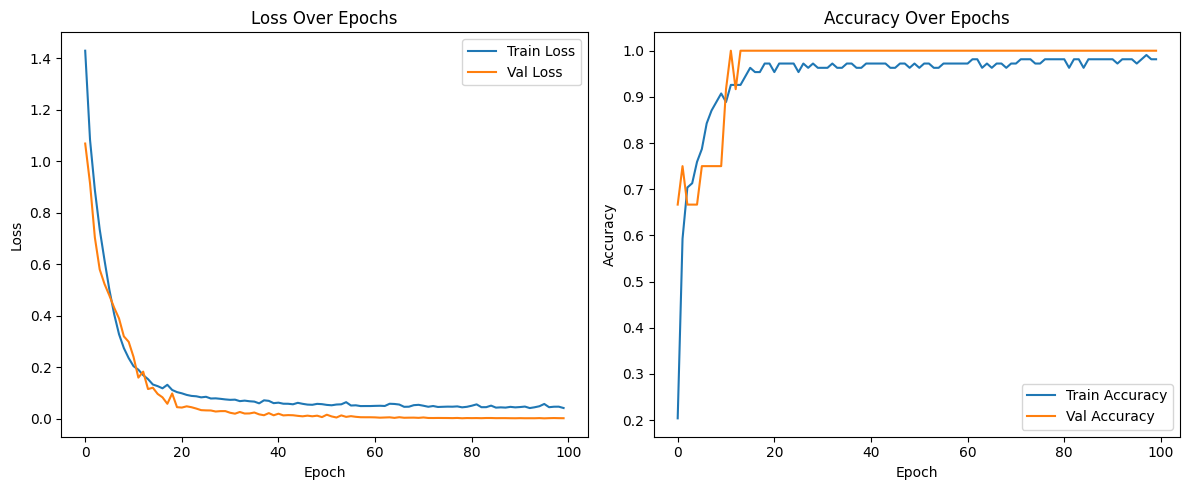

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(4, activation='relu', input_shape=(4,)),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# conclusions



1.   the training loss and the validation loss decrease at the same rate, which indicates there is no overfitting.
2.   test accuracy is 97%, which is good.
3.   success.




# let's try removing PC-4 and training a smaller model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)  # Reshape to 2D for OneHotEncoder

# remooving the petal length ficher (pc-4) from the data
X = X[:, :-1]

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# building smaller Neural Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2840 - loss: 1.1027 - val_accuracy: 0.0833 - val_loss: 1.1084
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3575 - loss: 1.0953 - val_accuracy: 0.0833 - val_loss: 1.1149
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4103 - loss: 1.0932 - val_accuracy: 0.0833 - val_loss: 1.1185
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4144 - loss: 1.0834 - val_accuracy: 0.0833 - val_loss: 1.1152
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2992 - loss: 1.0630 - val_accuracy: 0.0833 - val_loss: 1.0958
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4122 - loss: 0.9197 - val_accuracy: 0.5000 - val_loss: 1.0849
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6788 - loss: 0.8514 - val_accuracy: 0.5833 - val_loss: 1.0116
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6728 - loss: 0.7843 - val_accuracy: 0.5833 - 

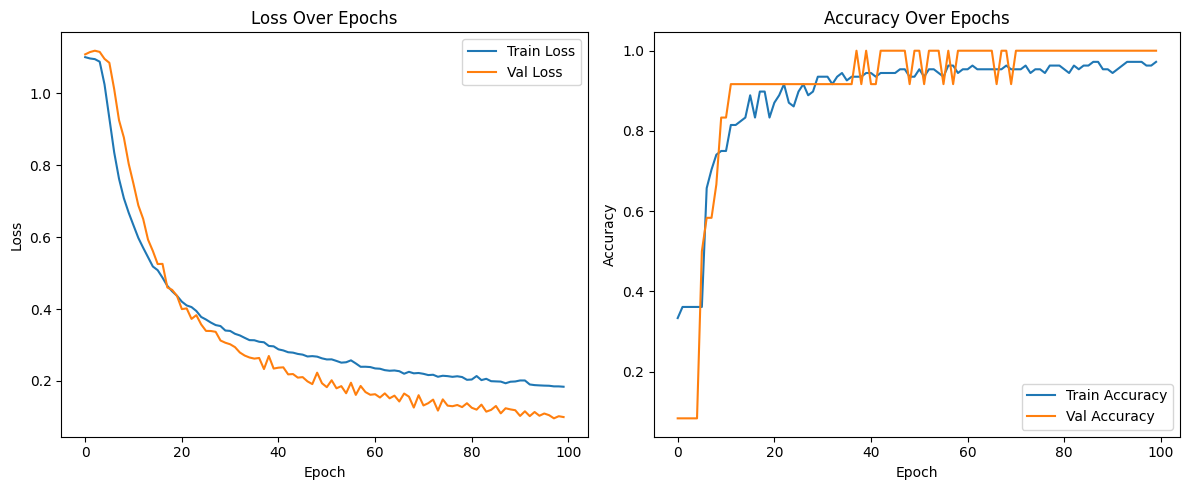

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(3, activation='relu', input_shape=(3,)),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# conclusions



1.   the training loss and the validation loss decrease at the same rate, which indicates there is no overfitting.
2.   test accuracy is 97%, which is as good as the larger Neural Network.
3.   with 14% fewer neurons and 28% fewer synapses, we have achieved the same result.